# **Data Analytics : Exercises**
> ## *Author* : [Rathachai CHAWUTHAI](https://rathachai.creatier.pro/) , Ph.D
> ### *Affiliation* : Computer Engineering, King Mongkut's Institute of Technology Ladkrabang (KMITL)
> #### *Updated Date* : 2024-07-14
---

Reference: https://www.kaggle.com/datasets/carrie1/ecommerce-data

**ความหมายแต่ละคอลัมน์**

* **⁠InvoiceNo**: คือ หมายเลขใบเสร็จ
* **StockCode**: คือ รหัสสินค้า
* **Description**: คือ ชื่อสินค้า
* **Quantity**: คือ จำนวนสินค้านั้นที่ซื้อในใบเสร็จ
* **InvoiceDate**: คือ วันที่/เวลา ของใบเสนอราคา
* **UnitPrice**: คือ ราคาสินค้าต่อชิ้น
* **CustomerID**: คือ รหัสลูกค้า
* **Country**: คือ ประเทศของลูกค้า



---



## Import

In [280]:
import numpy as np
import pandas as pd

## Examples
ตัวอย่างสำหรับเริ่มต้น

In [281]:
CSV_PATH = "https://rathachai.github.io/DA-LAB/datasets/ecom-dat.csv"

In [282]:
df = pd.read_csv(CSV_PATH)

In [283]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom
...,...,...,...,...,...,...,...,...
46850,581581,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,12/9/2011 12:20,2.89,17581.0,United Kingdom
46851,581581,23561,SET OF 6 RIBBONS PARTY,6,12/9/2011 12:20,2.89,17581.0,United Kingdom
46852,581581,23681,LUNCH BAG RED VINTAGE DOILY,10,12/9/2011 12:20,1.65,17581.0,United Kingdom
46853,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,12/9/2011 12:21,2.08,17581.0,United Kingdom


In [284]:
df['Total'] = df['Quantity'] * df['UnitPrice']

In [285]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85


---
### (Ex-01) จงหาลูกค้าที่ซื้อสินค้าบ่อยที่สุด 5 คนแรก

In [286]:
dfg = df.groupby(['CustomerID'])[['InvoiceNo']].nunique().sort_values('InvoiceNo', ascending=False)
dfg.head(5)

,InvoiceNo
CustomerID,
14911.0,197
14606.0,93
13408.0,60
13767.0,37
16133.0,32


---
### (Ex-02) จงหาความถี่การใช้จ่ายตามรายชั่วโมง

In [287]:
df['InvDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvDate
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80,2010-12-01 09:41:00
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90,2010-12-01 09:59:00
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85,2010-12-01 09:59:00


In [288]:
df['hr'] = df['InvDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,InvDate,hr
0,536380,22961,JAM MAKING SET PRINTED,24,12/1/2010 9:41,1.45,17809.0,United Kingdom,34.80,2010-12-01 09:41:00,9
1,536388,21754,HOME BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9
2,536388,21755,LOVE BUILDING BLOCK WORD,3,12/1/2010 9:59,5.95,16250.0,United Kingdom,17.85,2010-12-01 09:59:00,9
3,536388,21523,DOORMAT FANCY FONT HOME SWEET HOME,2,12/1/2010 9:59,7.95,16250.0,United Kingdom,15.90,2010-12-01 09:59:00,9
4,536388,21363,HOME SMALL WOOD LETTERS,3,12/1/2010 9:59,4.95,16250.0,United Kingdom,14.85,2010-12-01 09:59:00,9


In [289]:
df_by_hr = df.groupby('hr')[['InvoiceNo']].nunique()
df_by_hr

,InvoiceNo
hr,
7,2
8,59
9,180
10,291
11,262
12,354
13,307
14,264
15,212


<Axes: xlabel='hr'>

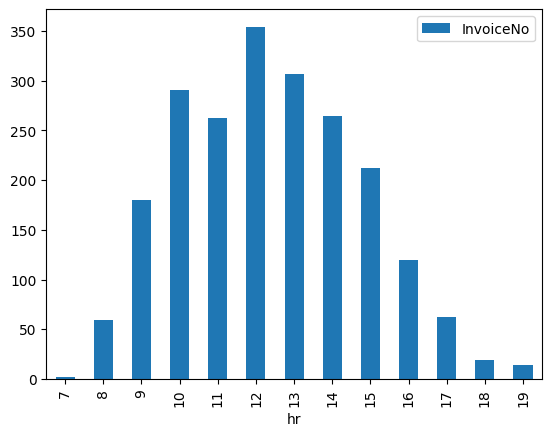

In [290]:
df_by_hr.plot.bar()



---



---


## Basic Exercises
โจทย์อย่างง่าย

### (B-01) จงนับจำนวน Invoice

In [291]:
df['InvoiceNo'].nunique()

2146

---
### (B-02) จงนับจำนวนลูกค้า

In [292]:
df['CustomerID'].nunique()

486

---
### (B-03) จงนับจำนวนสินค้า

hint
- description

In [293]:
df['Description'].nunique()

3202

---
### (B-04) มีประเทศใดบ้าง

In [294]:
df['Country'].unique()

array(['United Kingdom', 'Germany', 'EIRE', 'Japan', 'France',
       'Channel Islands', 'Denmark', 'Cyprus', 'Austria', 'Switzerland',
       'United Arab Emirates', 'Czech Republic', 'Spain', 'Italy',
       'European Community', 'Canada', 'Finland', 'Norway', 'Portugal'],
      dtype=object)

---
### (B-05) จงคำนวณจำนวนรายได้ทั้งหมด

In [295]:
df['Total'].sum()

np.float64(753421.941)

---
### (B-06) จงหาค่าใช้จ่ายเฉลี่ยต่อการซื้อ

In [296]:
df.groupby('InvoiceNo')[['Total']].sum().mean()

Total    351.081986
dtype: float64

---
### (B-07) จงหาค่าใช้จ่ายเฉลี่ยต่อลูกค้า

In [297]:
df.groupby('CustomerID')[['Total']].sum().mean()

Total    1550.250907
dtype: float64



---



---


## Advanced Exercises

โจทย์ยากขึ้น

### (Q-01) ลูกค้าจากประเทศใดมีการใช้จ่ายสูงที่สุด

hint:
- groupby country
- sum total
- เรียงจากมากไปน้อย
- เลือกแถวแรก

In [298]:
df.groupby('Country')[['Total']].sum().sort_values(ascending=False, by='Total').head(1)

,Total
Country,
United Kingdom,540707.491


---
### (Q-02) Invoice ใด มีจำนวนชิ้นสินค้าสูงที่สุด

In [299]:
df.groupby('InvoiceNo')[['Quantity']].sum().sort_values(ascending=False, by='Quantity').head(1)

,Quantity
InvoiceNo,
567183,2673


---
### (Q-03) Invoice ใด มีค่าใช้จ่ายสูงที่สุด

In [300]:
df.groupby('InvoiceNo')[['Total']].sum().sort_values(ascending=False, by='Total').head(1)

,Total
InvoiceNo,
567183,3829.09


---
### (Q-04) Invoice ใด มีชนิดสินค้ามากที่สุด

hint
- nunique

In [301]:
df.groupby('InvoiceNo')[['Description']].nunique().sort_values(ascending=False, by='Description').head(1)

,Description
InvoiceNo,
567183,385


---
### (Q-05) ลูกค้าใดซื้อสินค้าบ่อยที่สุด

In [302]:
df.groupby('CustomerID')[['InvoiceNo']].nunique().sort_values(ascending=False, by='InvoiceNo').head(1)

,InvoiceNo
CustomerID,
14911.0,197


---
### (Q-06) จงแสดงจำนวนลูกค้าในแต่ละประเทศด้วยกราฟแทงแนวนอน

hint
- nunique
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html

<Axes: ylabel='Country'>

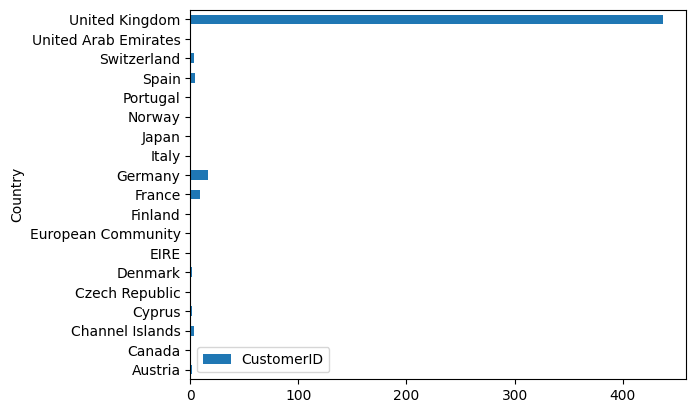

In [303]:
# solution 1
# df.groupby('Country')[['CustomerID']].nunique().plot.barh()

# solution 2
temp_df = df.groupby('Country')[['CustomerID']].nunique().reset_index()
temp_df.plot.barh(x='Country', y='CustomerID')

---
### (Q-07) จงแสดงจำนวน invoice ในแต่ละวันในสัปดาห์ ในรูปกราฟแท่ง

hint
- ลองค้นหาด้วย "pandas dayofweek"

<Axes: xlabel='dayOfweek'>

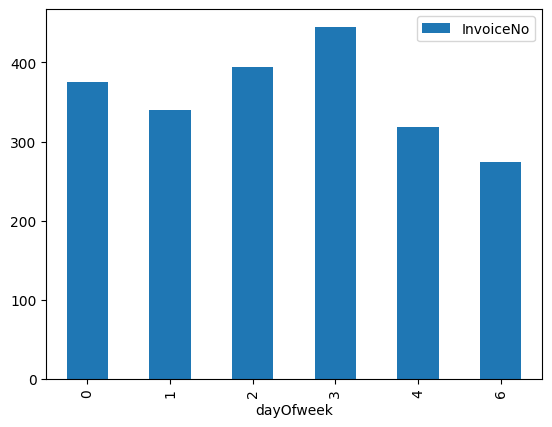

In [304]:
# 0 = Monday
df['dayOfweek'] = df['InvDate'].dt.day_of_week
df.groupby('dayOfweek')[['InvoiceNo']].nunique().plot.bar()

---
### (Q-08) จงแสดงจำนวนรายได้ในแต่ละเดือน ในรูปกราฟแท่ง

hint
- ลองค้นหาด้วย "pandas datetime strftime"
- ใช้รูปแบบ "%Y-%m"

<Axes: xlabel='YearMonth'>

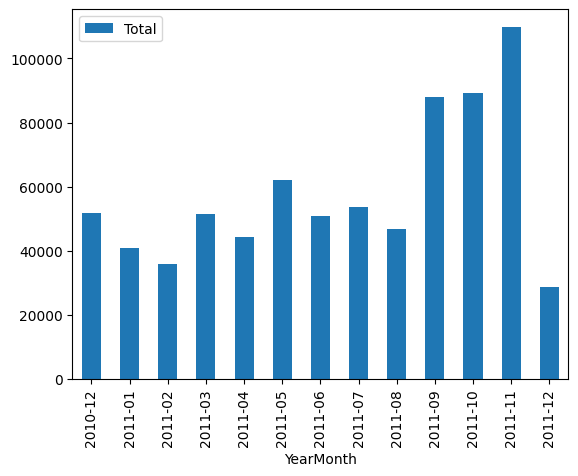

In [305]:
df['YearMonth'] = df['InvDate'].dt.strftime('%Y-%m')
df.groupby('YearMonth')[['Total']].sum().plot.bar()

---
### (Q-09) จงหา top 5 สินค้าใดขายดีในเดือน 12


In [306]:
df['month'] = df['InvDate'].dt.month
df[df['month'] == 12].groupby('Description')[['Quantity']].sum().sort_values(by='Quantity', ascending=False).head(5)

,Quantity
Description,
ASSORTED COLOUR BIRD ORNAMENT,386
WORLD WAR 2 GLIDERS ASSTD DESIGNS,339
PAPER CHAIN KIT 50'S CHRISTMAS,323
PAPER CHAIN KIT VINTAGE CHRISTMAS,314
PACK OF 72 RETROSPOT CAKE CASES,298


---
### (Q-10) จงหา top 5 สินค้าประเภทไม้ที่ขายได้ดีในเดือน 12

hint
- มีคำว่า "WOODEN"
- ลองค้นหาด้วยคำว่า "pandas string contains"

In [307]:
df[(df['month'] == 12) & (df['Description'].str.contains("WOODEN"))].groupby('Description')[['Quantity']].sum().sort_values(by='Quantity', ascending=False).head(5)

,Quantity
Description,
WOODEN HEART CHRISTMAS SCANDINAVIAN,122
WOODEN STAR CHRISTMAS SCANDINAVIAN,116
WOODEN BOX OF DOMINOES,111
SWALLOW WOODEN CHRISTMAS DECORATION,61
PEACE WOODEN BLOCK LETTERS,58


---
### (Q-11) สินค้าที่มีคำว่า CHRISTMAS ขายได้ดีที่สุดในเดือนใด

In [308]:
df[df['Description'].str.contains("CHRISTMAS")].groupby('month')[['Quantity']].sum().sort_values(by='Quantity', ascending=False).head(1)

,Quantity
month,
11,9086


---
### (Q-12) ลูกค้าคนใดบ้างที่ซื้อสินค้าแทบทุกเดือน

hint
- groupby ลูกค้า, เดือน แล้ว count
- groupby ลูกค้า แล้ว count
- เรียงจากมากไปน้อย
- เลือกลูกค้าที่มีคะแนนสูงสุด (อาจจะมีหลายคน)

In [309]:
temp = df.groupby(['CustomerID', 'month'])[['InvoiceNo']].nunique()
temp = temp.reset_index()
temp = temp.groupby('CustomerID')[['month']].nunique().sort_values(by='month', ascending=False)

In [310]:
temp[temp['month'] == max(temp['month'])]

,month
CustomerID,
14911.0,12
14606.0,12
18109.0,12
13408.0,12
13319.0,12
14796.0,12


---
### (Q-13) จงจัดกลุ่มลูกค้าตามจำนวน invoice และราคาในการซื้อสินค้า ของแต่ละคน

hint 😵

In [324]:
temp_1 = df.groupby('CustomerID')[['InvoiceNo']].nunique()
temp_1.reset_index(inplace=True)

temp_2 = df.groupby('CustomerID')[['Total']].sum()
temp_2.reset_index(inplace=True)

merged_df = temp_1.merge(temp_2, on='CustomerID')
merged_df.groupby(['InvoiceNo', 'CustomerID'])[['Total']].sum()

Total
InvoiceNo CustomerID           
1         12365.0        320.69
          12398.0       1635.66
          12403.0        427.70
          12405.0       1710.39
          12441.0        173.55
...                         ...
32        16133.0       9894.00
37        13767.0      12154.16
60        13408.0      19424.08
93        14606.0      11523.27
197       14911.0     119469.48

[486 rows x 1 columns]




---
https://rathachai.creatier.pro/

## つづく
